In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [43]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings (1).csv


In [ ]:
df = pd.read_csv("hotel_bookings.csv")
df = df.drop(index = 6309)
df

Исследовать данные.

In [ ]:
print(df.isna().sum())

In [ ]:
df = df.dropna(axis='index', how='any', subset=['country'])
df['agent'] = df['agent'].fillna(df['agent'].mean())
df = df.drop(columns = ['company', 'reservation_status', 'reservation_status_date'])

In [133]:
le = preprocessing.LabelEncoder()

df['hotel'] = preprocessing.LabelEncoder().fit_transform(df['hotel'])
df['arrival_date_month'] = preprocessing.LabelEncoder().fit_transform(df['arrival_date_month'])
df['meal'] = preprocessing.LabelEncoder().fit_transform(df['meal'])
df['country'] = preprocessing.LabelEncoder().fit_transform(df['country'])
df['market_segment'] = preprocessing.LabelEncoder().fit_transform(df['market_segment'])
df['distribution_channel'] = preprocessing.LabelEncoder().fit_transform(df['distribution_channel'])
df['reserved_room_type'] = preprocessing.LabelEncoder().fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = preprocessing.LabelEncoder().fit_transform(df['assigned_room_type'])
df['deposit_type'] = preprocessing.LabelEncoder().fit_transform(df['deposit_type'])
df['customer_type'] = preprocessing.LabelEncoder().fit_transform(df['customer_type'])

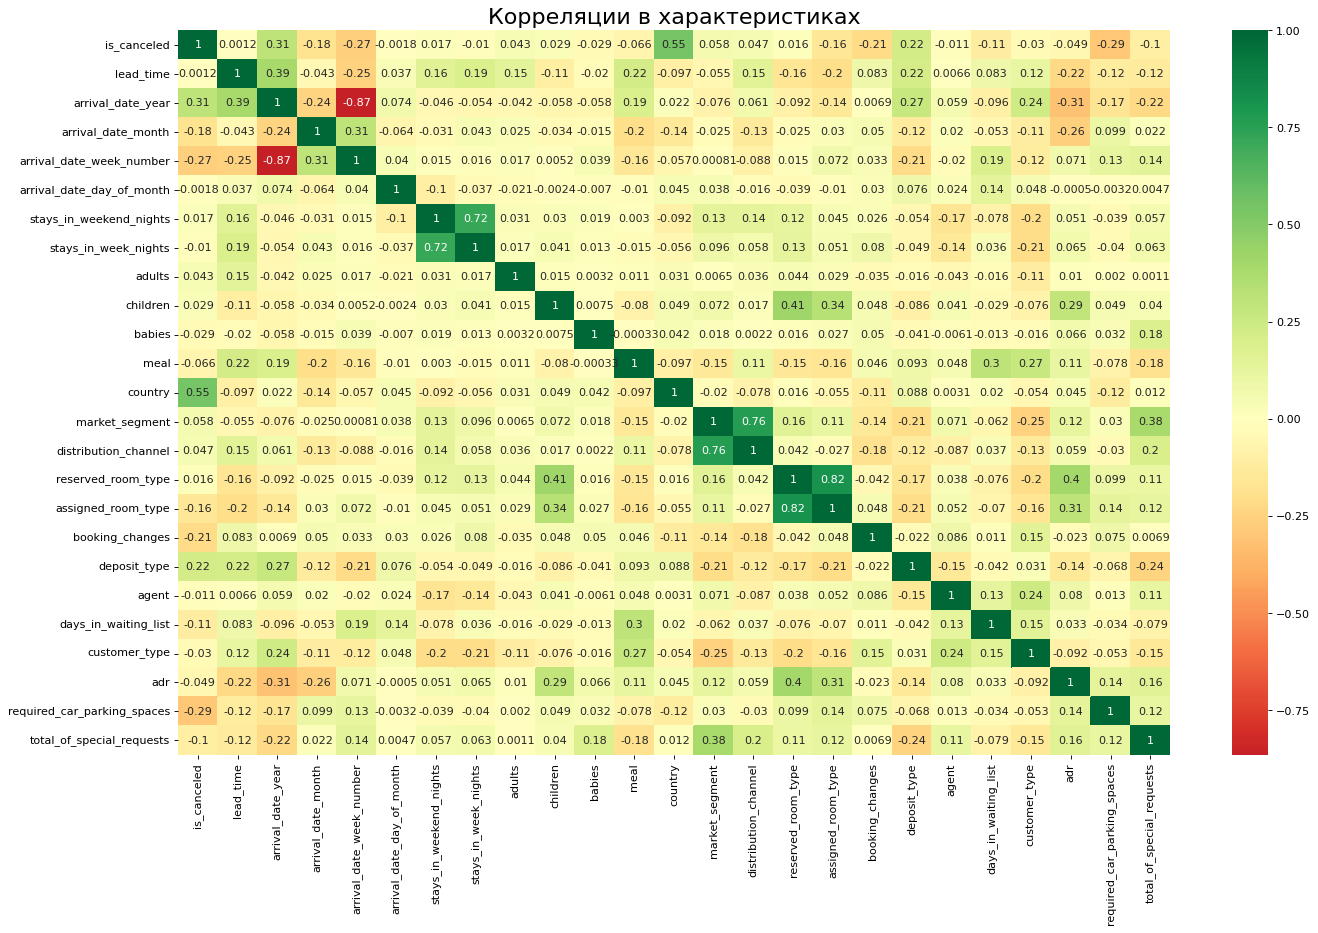

In [135]:
plt.figure(figsize=(20,12), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()

In [ ]:
for i in range(31):
  if df.iloc[:, i].sum() == 0:
    print(df.columns[i])

In [134]:
df = df.drop(columns = ['hotel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled'])

Создать тренировочную и тестовую подвыборки

In [136]:
y = df['is_canceled']
x = df.drop(columns='is_canceled')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Построить модель логистической регрессии по своему набору данных

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

Получить коэффиценты уравнения логистической регрессии (т.е. уравнение разделяющей поверхности). Сделать вывод какие из признаков оказались наиболее значимыми, какие нет и почему

In [ ]:
w0 = model.intercept_
w1 = model.coef_
w1 = w1.reshape(-1)
mas = []
i = 0
for key in X_train.keys():
  mas.append((key, w1[i]))
  i += 1
mas.sort(key=lambda x: abs(x[1]))
print(w0)
mas

Написать уравнение логистической регрессии

In [15]:
ans = str(w0)
for i in range(28):
  ans = ans + ' + ' + str(w1[i]) + ' * ' + list(df.columns)[i]
print(ans)

[-2.09764925e-05] + 0.0 * hotel + 0.00014639492827833188 * is_canceled + -0.0019776593723882935 * lead_time + -0.1201125842395438 * arrival_date_year + -0.03908340466861861 * arrival_date_month + 0.005730770795629435 * arrival_date_week_number + 0.06490758970117756 * arrival_date_day_of_month + 0.07346886309832217 * stays_in_weekend_nights + 0.015768928245146037 * stays_in_week_nights + 0.008752397542836356 * adults + -0.0049950182772032425 * children + -0.0154964921722775 * babies + 0.14251048578328443 * meal + 0.07743326269578386 * country + 0.034798289911220616 * market_segment + 0.0 * distribution_channel + 0.0 * is_repeated_guest + 0.0 * previous_cancellations + 0.0496005895979762 * previous_bookings_not_canceled + -0.1471952390825761 * reserved_room_type + -0.07719784160854654 * assigned_room_type + 0.03630035655953332 * booking_changes + 0.0008830173292314105 * deposit_type + -0.0275778669097635 * agent + -0.009460834753625311 * days_in_waiting_list + -0.0048186586157877714 * cu

Вывести confusion matrix для получившейся модели

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
answers_pred = model.predict(X_test)
cm = confusion_matrix(y_test, answers_pred)
cm

Вручную посчитать метрики: accuracy, recall, precision. f1

In [140]:
print('accuracy:', (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
recall = cm[0][0]/(cm[0][0]+cm[1][0])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
print('recall:', recall)
print('precision:', precision)
print('f1:', 2 * (precision * recall)/(precision+recall))

accuracy: 0.7960908610670893
recall: 0.8652849740932642
precision: 0.7031578947368421
f1: 0.7758420441347271


Посчитать метрики с помощью библиотеки sklearn и сравнить с оценками из п.7

In [141]:
print('accuracy:', accuracy_score(y_test, answers_pred))
print('recall:', recall_score(y_test, answers_pred))
print('precision:', precision_score(y_test, answers_pred))
print('f1:', f1_score(y_test, answers_pred))

accuracy: 0.7960908610670893
recall: 0.8897136797454931
precision: 0.7484388938447815
f1: 0.812984496124031


Сделать письменный вывод получившихся результатов (хорошие или плохие получились метрики и почему)